# Deliverable 3

# Questions to Answer:

## 1. How white turnout attrition since 2015 in vote total -Flaherty
## 2. Michelle Wu how has her performance changed over time
## 3. Add a subsection to your analysis which breaks down your findings for District 3 (Wards 13, 15, 16)

In [295]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# processing data
def read_data(filename, wp):
    df = pd.read_csv(filename)
    df[wp] = df[wp].astype('Int64')
    #df['wp_string'] = df[wp].apply(lambda x: str(x).zfill(4))
    return df

df_2011 = read_data("2011_CityCouncil_Results_Race_Turnout.csv", "WP")
df_2013 = read_data("2013_CityCouncil_Race_Turnout_Results.csv", "WP")
df_2015 = read_data("2015_city_council.csv","WP").drop([253])
df_2017 = read_data("2017_CityCouncil_AtLarge_Turnout_Race.csv", "Ward_Precinct").drop([253])
df_2019 = read_data("2019 CC Race Turnout.csv","Precinct_y")

In [296]:
# 1. How white turnout attrition since 2015 in vote total - MICHAEL F FLAHERTY

#ward_precinct and white(alone)
#df_f = df_2015[['wp_string','WP','White Percentage' ,'MICHAEL F FLAHERTY']]
df_f = df_2015[['WP','White Percentage' ,'MICHAEL F FLAHERTY']]
df_f = df_f.rename(columns= {"WP":"Precinct"})
df_f = df_f.rename(columns= {"MICHAEL F FLAHERTY":"Flaherty_2015"})
df_f = df_f.join(df_2017[["MICHAEL F FLAHERTY"]])
df_f = df_f.rename(columns= {"MICHAEL F FLAHERTY":"Flaherty_2017"})
df_f = df_f.join(df_2019[["Flaherty"]])
df_f = df_f.rename(columns= {"Flaherty":"Flaherty_2019"})
df_f['Diff_15_17'] = round((df_f['Flaherty_2017'] - df_f['Flaherty_2015'])/df_f['Flaherty_2015'], 3)
df_f['Diff_17_19'] = round((df_f['Flaherty_2019'] - df_f['Flaherty_2017'])/df_f['Flaherty_2017'], 3)
df_f['Diff_15_19'] = round((df_f['Flaherty_2019'] - df_f['Flaherty_2015'])/df_f['Flaherty_2015'], 3)
df_f['Diff_Ave'] = round((abs(df_f['Diff_15_17']) + abs(df_f['Diff_17_19']))/2, 3)

In [297]:
print("Average Turnout Change from 2015 to 2017:",df_f['Diff_15_17'].mean())
print("Average Turnout Change from 2017 to 2019:",df_f['Diff_17_19'].mean())
print("Average Turnout Change from 2015 to 2019:",df_f['Diff_15_19'].mean())

Average Turnout Change from 2015 to 2017: 1.1188888888888888
Average Turnout Change from 2017 to 2019: -0.3228571428571428
Average Turnout Change from 2015 to 2019: 0.39827777777777773


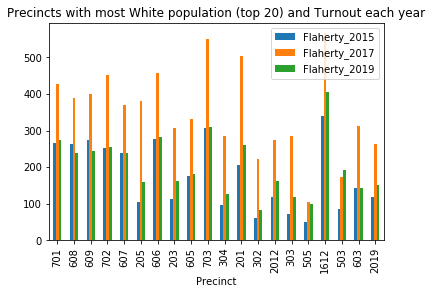

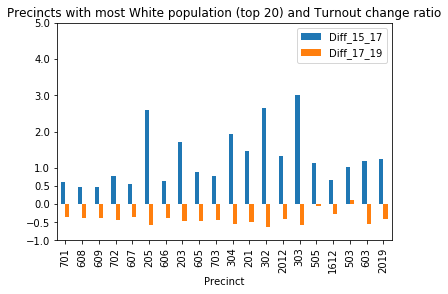

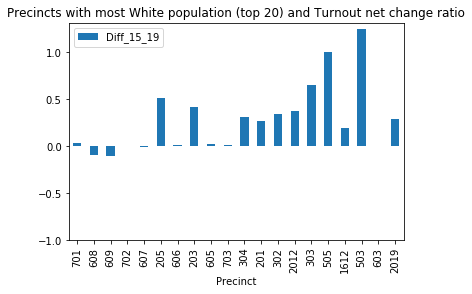

In [298]:
# visualizing top 20
top_white_fla = df_f.sort_values(by = ["White Percentage"],ascending = False)
top_white_fla[:20].plot(x = "Precinct", y = ['Flaherty_2015','Flaherty_2017','Flaherty_2019'], kind = 'bar', title = "Precincts with most White population (top 20) and Turnout each year")
top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with most White population (top 20) and Turnout change ratio")
top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1], title = "Precincts with most White population (top 20) and Turnout net change ratio")

# visualizing least 20
#top_white_fla[-20:].plot(x = "Precinct", y = ['Flaherty_2015','Flaherty_2017','Flaherty_2019'], kind = 'bar',title = "Precincts with lowest White population (last 20) and Turnout each year")
#top_white_fla[-20:].plot(x = "Precinct", y = ['Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest White population (last 20) and Turnout change ratio")
#top_white_fla[-20:].plot(x = "Precinct", y = ['Diff_15_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1], title = "Precincts with lowest White population (last 20) and Turnout net change ratio")


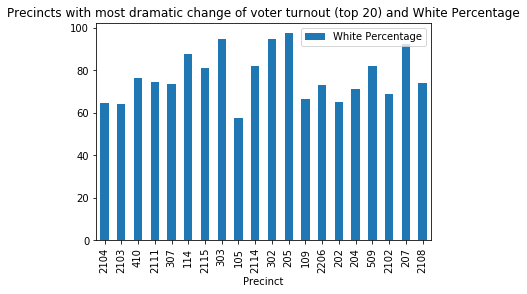

In [299]:
top_change_fla = df_f.sort_values(by = ["Diff_Ave"],ascending = False)
top_change_fla[:20].plot(x = "Precinct", y = ['White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of voter turnout (top 20) and White Percentage")
# >1.431

In [300]:
# 2. Michelle Wu how has her performance changed over time

# She started to run the city council starting from 2013

def turnout_change_race():
    #df_f = df_2013[['wp_string','WP','Black Percentage', 'Hispanic Percentage', 'Asian Percentage' , 'White Percentage','MICHELLE WU']]
    df_f = df_2013[['WP','Black Percentage', 'Hispanic Percentage', 'Asian Percentage' , 'White Percentage','MICHELLE WU']]
    df_f = df_f.rename(columns= {"MICHELLE WU":"WU_2013"})
    df_f = df_f.rename(columns= {"WP":"Precinct"})
    
    df_f = df_f.join(df_2015[["MICHELLE WU"]])
    df_f = df_f.rename(columns= {"MICHELLE WU":"WU_2015"})
    
    df_f = df_f.join(df_2017[["MICHELLE WU"]])
    df_f = df_f.rename(columns= {"MICHELLE WU":"WU_2017"})
    
    df_f = df_f.join(df_2019[["Wu"]])
    df_f = df_f.rename(columns= {"Wu":"WU_2019"})
    return df_f


df_wu = turnout_change_race()

df_wu['Diff_13_15'] = round((df_wu['WU_2015'] - df_wu['WU_2013'])/df_wu['WU_2013'], 3)
df_wu['Diff_15_17'] = round((df_wu['WU_2017'] - df_wu['WU_2015'])/df_wu['WU_2015'], 3)
df_wu['Diff_17_19'] = round((df_wu['WU_2019'] - df_wu['WU_2017'])/df_wu['WU_2017'], 3)
df_wu['Diff_Ave'] = round((abs(df_wu['Diff_13_15']) + abs(df_wu['Diff_15_17'])+ abs(df_wu['Diff_17_19']))/3, 3)

df_wu['Diff_net_13_19'] = round((df_wu['WU_2019'] - df_wu['WU_2013'])/df_wu['WU_2013'], 3)

In [301]:
print("Average Turnout Change from 2013 to 2015:",df_wu['Diff_13_15'].mean())
print("Average Turnout Change from 2015 to 2017:",df_wu['Diff_15_17'].mean())
print("Average Turnout Change from 2017 to 2019:",df_wu['Diff_17_19'].mean())
#print("Average Turnout Change from 2015 to 2017:",df_wu['Diff_Ave'].mean())

print("Average Turnout Change from 2013 to 2019:",df_wu['Diff_net_13_19'].mean())

Average Turnout Change from 2013 to 2015: -0.5017588932806326
Average Turnout Change from 2015 to 2017: 1.424488095238095
Average Turnout Change from 2017 to 2019: -0.34796031746031747
Average Turnout Change from 2013 to 2019: -0.28663241106719384


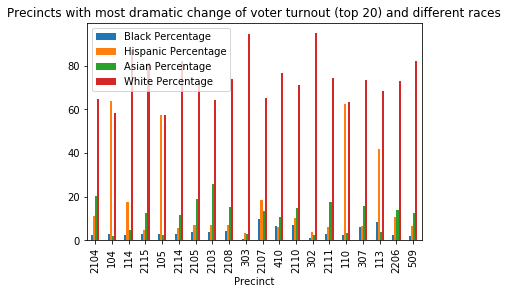

In [302]:
top_change_wu = df_wu.sort_values(by = ["Diff_Ave"],ascending = False)
top_change_wu[:20].plot(x = "Precinct", y = ['Black Percentage', 'Hispanic Percentage', 'Asian Percentage','White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of voter turnout (top 20) and different races")
# >1.331

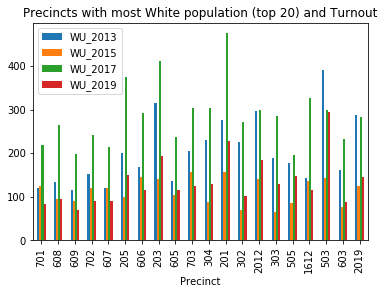

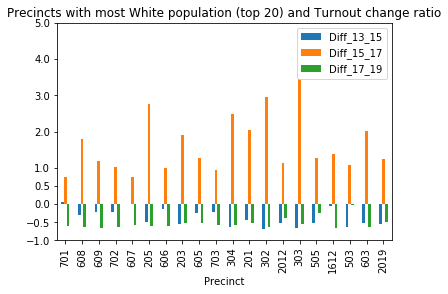

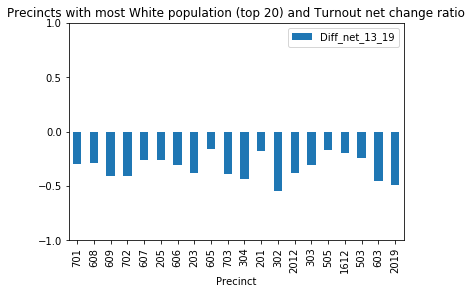

In [303]:
top_white_wu = df_wu.sort_values(by = ["White Percentage"],ascending = False)

# visualizing top 20 (white)
top_white_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most White population (top 20) and Turnout")
top_white_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with most White population (top 20) and Turnout change ratio")
top_white_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most White population (top 20) and Turnout net change ratio")

# visualizing least 20 (white)
#top_white_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with lowest White population (last 20) and Turnout")
#top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest White population (last 20) and Turnout change ratio")
#top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest White population (last 20) and Turnout net change ratio")


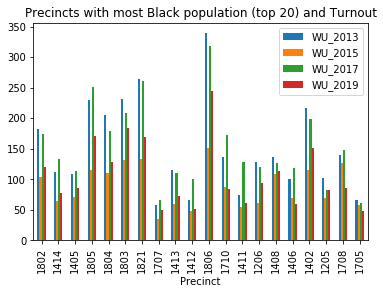

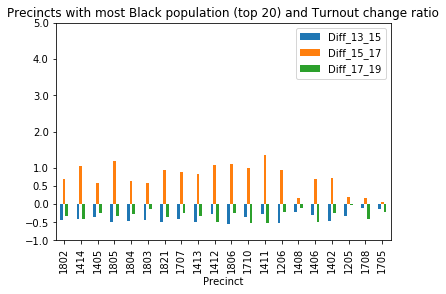

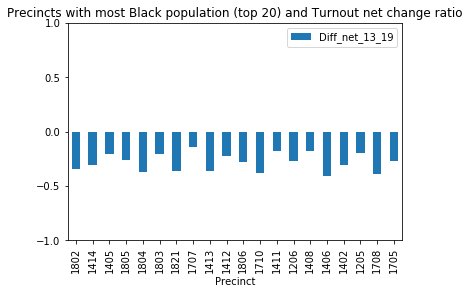

In [304]:
top_black_wu = df_wu.sort_values(by = ["Black Percentage"],ascending = False)

# visualizing top 20 (black)
top_black_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most Black population (top 20) and Turnout")
top_black_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with most Black population (top 20) and Turnout change ratio")
top_black_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most Black population (top 20) and Turnout net change ratio")


# visualizing least 20 (black)
#top_black_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Black population (last 20) and Turnout")
#top_black_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with lowest Black population (last 20) and Turnout change ratio")
#top_black_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Black population (last 20) and Turnout net change ratio")


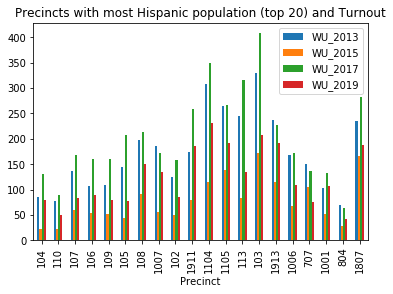

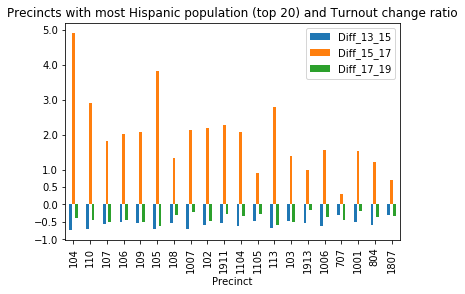

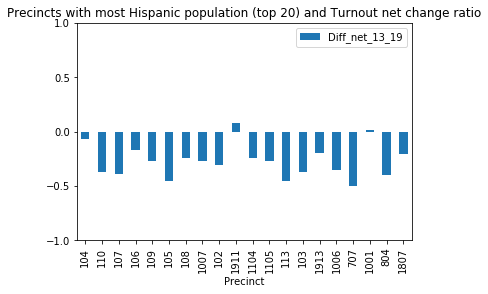

In [305]:
top_his_wu = df_wu.sort_values(by = ['Hispanic Percentage'],ascending = False)

# visualizing top 20 (Hispanic or Latino)
top_his_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most Hispanic population (top 20) and Turnout")
top_his_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with most Hispanic population (top 20) and Turnout change ratio")
top_his_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most Hispanic population (top 20) and Turnout net change ratio")


# visualizing least 20 (Hispanic or Latino)
#top_his_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Hispanic population (last 20) and turnout")
#top_his_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest Hispanic population (last 20) and turnout change ratio")
#top_his_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Hispanic population (last 20) and Turnout net change ratio")



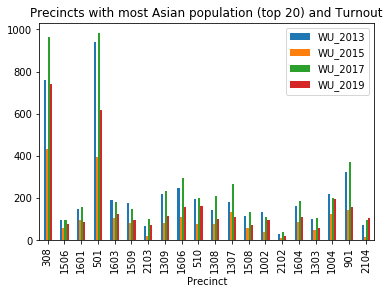

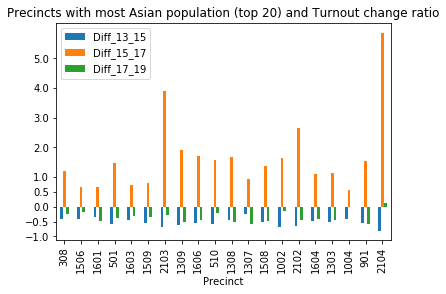

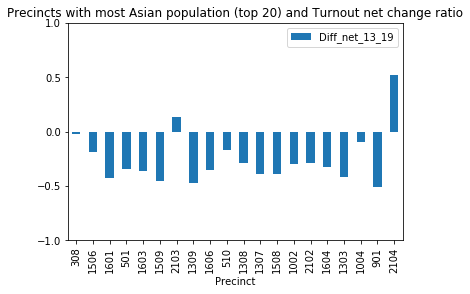

In [306]:
top_asian_wu = df_wu.sort_values(by = ['Asian Percentage'],ascending = False)

# visualizing top 20 (Asian)
top_asian_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most Asian population (top 20) and Turnout")
top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with most Asian population (top 20) and Turnout change ratio")
top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most Asian population (top 20) and Turnout net change ratio")

# visualizing least 20 (Asian)
#top_asian_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Asian population (last 20) and turnout")
#top_asian_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest Asian population (last 20) and Turnout change ratio")
#top_asian_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Asian population (last 20) and Turnout net change ratio")



In [307]:
# 3. Add a subsection to your analysis which breaks down your findings for District 3 (Wards 13, 15, 16)
def Dorcester_precincts(df):
    columns = df.columns.to_list()
    index = columns.index("Precinct")
    
    data_array = df.to_numpy()
    
    rows = []
    for i in range(np.shape(data_array)[0]):
        current_p = str(int(data_array[i, index]))
        if len(current_p) == 4:
            if current_p[0:2] == '13' or current_p[0:2] == '15' or current_p[0:2] == '16' or current_p[0:2] == '17':
                rows.append(data_array[i].tolist())
    
    Dorcester_df = pd.DataFrame(np.asarray(rows), columns = df.columns)
    Dorcester_df["Precinct"] = Dorcester_df["Precinct"].astype('Int64')
    return Dorcester_df

d_df_wu = Dorcester_precincts(df_wu)
d_df_f = Dorcester_precincts(df_f)

In [308]:
print(d_df_f.head())

   Precinct  White Percentage  Flaherty_2015  Flaherty_2017  Flaherty_2019  \
0      1301          8.518754           94.0          104.0           99.0   
1      1302         12.184250           24.0           41.0           33.0   
2      1303         47.758347           64.0          108.0           65.0   
3      1304         14.908803           43.0           73.0           62.0   
4      1305         24.704142           41.0           86.0           55.0   

   Diff_15_17  Diff_17_19  Diff_15_19  Diff_Ave  
0       0.106      -0.048       0.053     0.077  
1       0.708      -0.195       0.375     0.452  
2       0.688      -0.398       0.016     0.543  
3       0.698      -0.151       0.442     0.424  
4       1.098      -0.360       0.341     0.729  


In [309]:
print("Average Turnout Change from 2015 to 2017:", d_df_f['Diff_15_17'].mean())
print("Average Turnout Change from 2017 to 2019:", d_df_f['Diff_17_19'].mean())

print("Average Turnout Change from 2015 to 2019:", d_df_f['Diff_15_19'].mean())

Average Turnout Change from 2015 to 2017: 0.573688888888889
Average Turnout Change from 2017 to 2019: -0.3701111111111111
Average Turnout Change from 2015 to 2019: -0.02206666666666667


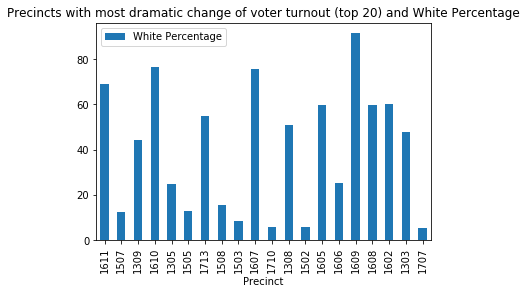

In [310]:
d_top_change_fla = d_df_f.sort_values(by = ["Diff_Ave"],ascending = False)
d_top_change_fla[:20].plot(x = "Precinct", y = ['White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of voter turnout (top 20) and White Percentage")


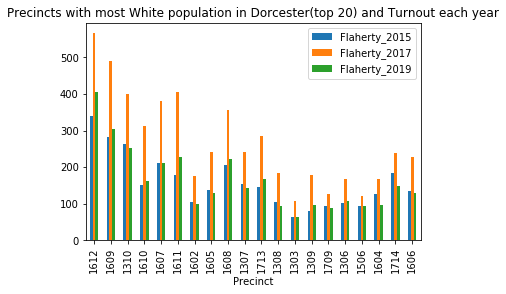

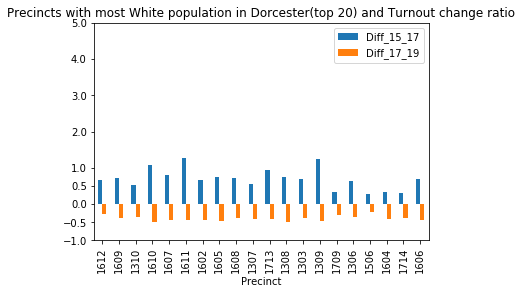

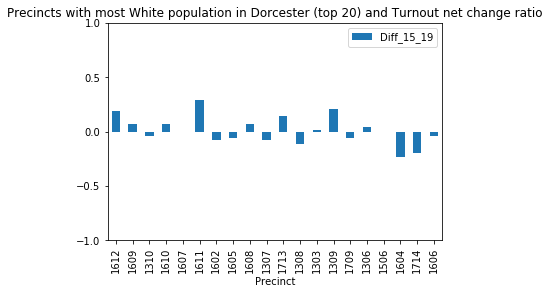

In [311]:
d_top_white_fla = d_df_f.sort_values(by = ["White Percentage"],ascending = False)
# visualizing top 20
d_top_white_fla[:20].plot(x = "Precinct", y = ['Flaherty_2015','Flaherty_2017','Flaherty_2019'], kind = 'bar', title = "Precincts with most White population in Dorcester(top 20) and Turnout each year")
d_top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with most White population in Dorcester(top 20) and Turnout change ratio")
d_top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1], title = "Precincts with most White population in Dorcester (top 20) and Turnout net change ratio")

# visualizing least 20 (white)
#d_top_white_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with lowest White population in Dorcester (last 20) and Turnout")
#d_top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest White population in Dorcester (last 20) and Turnout change ratio")
#d_top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest White population in Dorcester (last 20) and Turnout net change ratio")



In [312]:
print("Average Turnout Change from 2013 to 2015:", d_df_wu['Diff_13_15'].mean())
print("Average Turnout Change from 2015 to 2017:", d_df_wu['Diff_15_17'].mean())
print("Average Turnout Change from 2017 to 2019:", d_df_wu['Diff_17_19'].mean())

print("Average Turnout Change from 2013 to 2019:", d_df_wu['Diff_net_13_19'].mean())

Average Turnout Change from 2013 to 2015: -0.4107333333333333
Average Turnout Change from 2015 to 2017: 0.9074222222222221
Average Turnout Change from 2017 to 2019: -0.40373333333333333
Average Turnout Change from 2013 to 2019: -0.3704444444444443


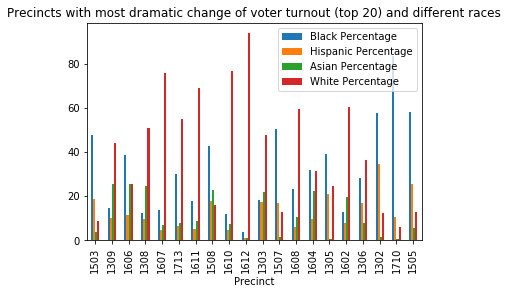

In [313]:
d_top_change_wu = d_df_wu.sort_values(by = ["Diff_Ave"],ascending = False)
d_top_change_wu[:20].plot(x = "Precinct", y = ['Black Percentage', 'Hispanic Percentage', 'Asian Percentage','White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of voter turnout (top 20) and different races")


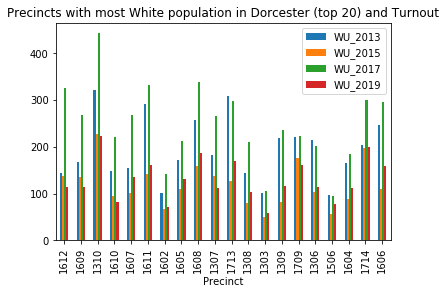

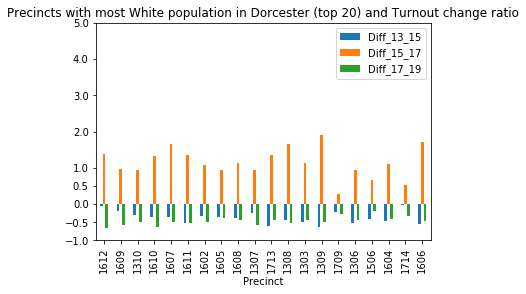

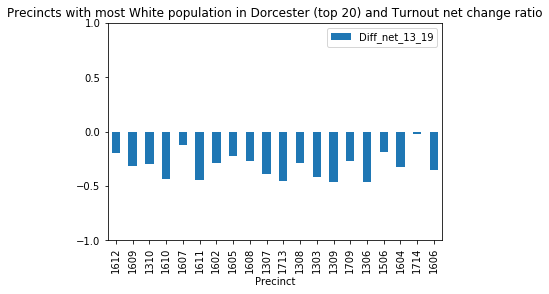

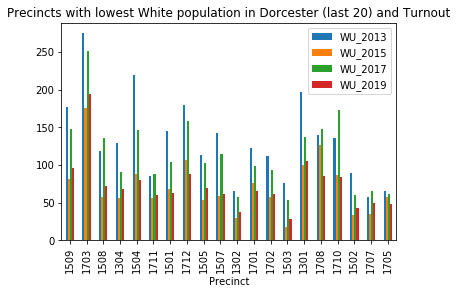

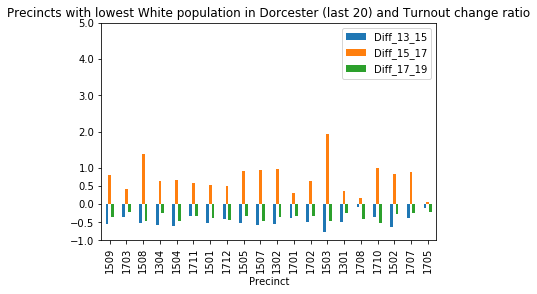

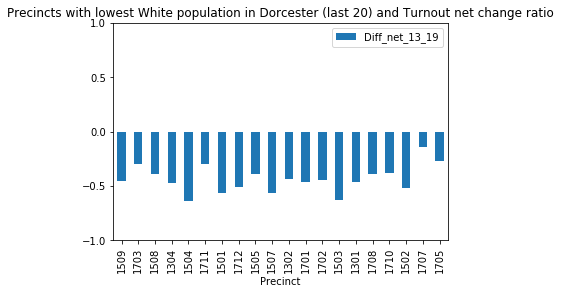

In [314]:
d_top_white_wu = d_df_wu.sort_values(by = ["White Percentage"],ascending = False)

# visualizing top 20 (white)
d_top_white_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most White population in Dorcester (top 20) and Turnout")
d_top_white_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with most White population in Dorcester (top 20) and Turnout change ratio")
d_top_white_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most White population in Dorcester (top 20) and Turnout net change ratio")

# visualizing least 20 (white)
d_top_white_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with lowest White population in Dorcester (last 20) and Turnout")
d_top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest White population in Dorcester (last 20) and Turnout change ratio")
d_top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest White population in Dorcester (last 20) and Turnout net change ratio")


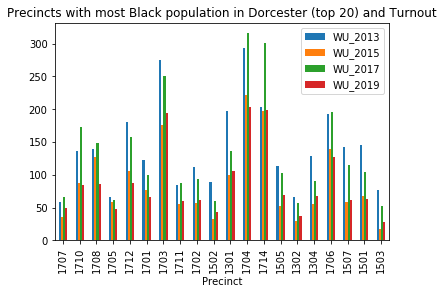

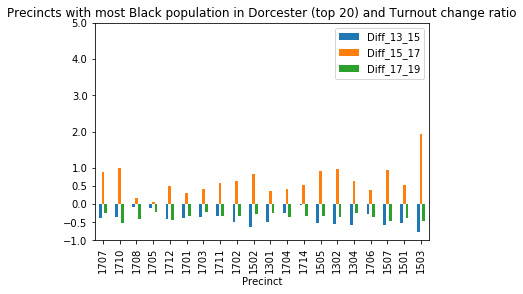

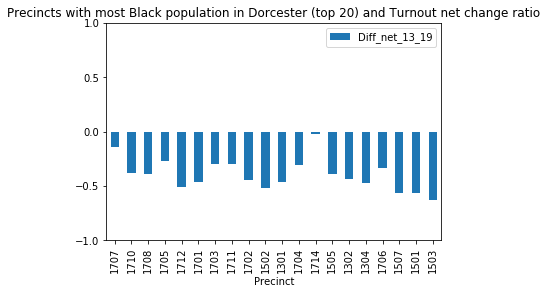

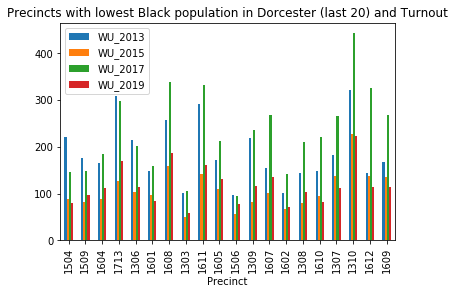

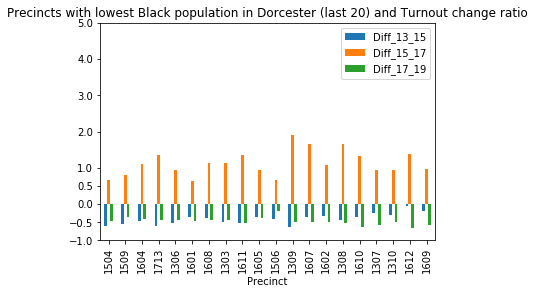

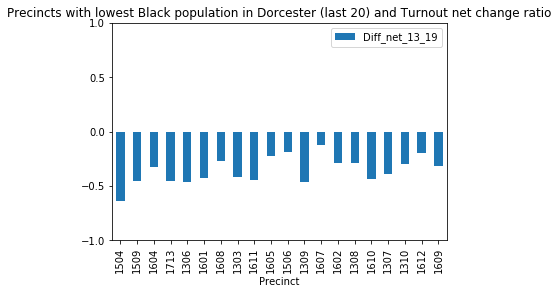

In [315]:
d_top_black_wu = d_df_wu.sort_values(by = ["Black Percentage"],ascending = False)

# visualizing top 20 (black)
d_top_black_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most Black population in Dorcester (top 20) and Turnout")
d_top_black_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with most Black population in Dorcester (top 20) and Turnout change ratio")
d_top_black_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most Black population in Dorcester (top 20) and Turnout net change ratio")


# visualizing least 20 (black)
d_top_black_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Black population in Dorcester (last 20) and Turnout")
d_top_black_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with lowest Black population in Dorcester (last 20) and Turnout change ratio")
d_top_black_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Black population in Dorcester (last 20) and Turnout net change ratio")


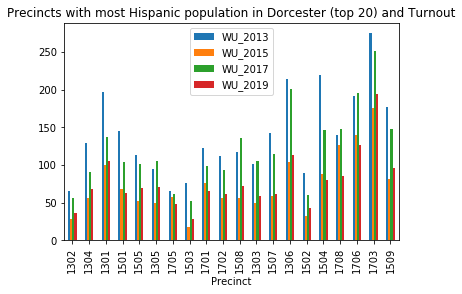

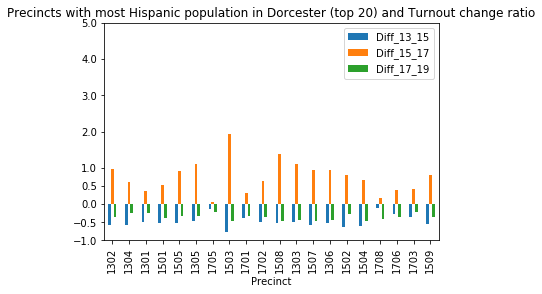

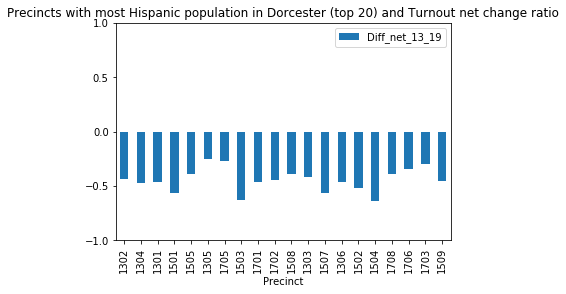

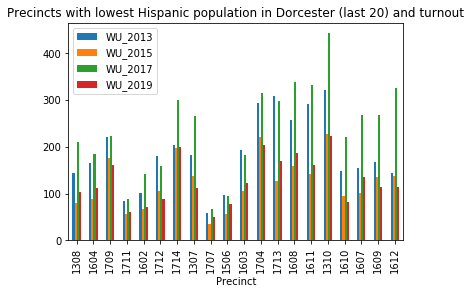

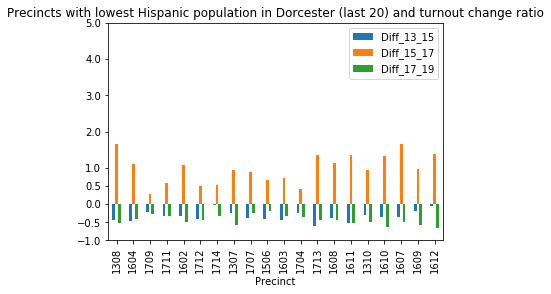

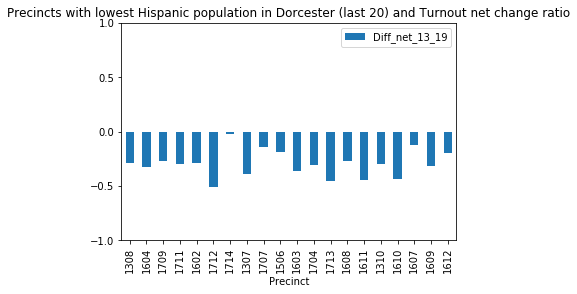

In [316]:
d_top_his_wu = d_df_wu.sort_values(by = ['Hispanic Percentage'],ascending = False)

# visualizing top 20 (Hispanic or Latino)
d_top_his_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most Hispanic population in Dorcester (top 20) and Turnout")
d_top_his_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with most Hispanic population in Dorcester (top 20) and Turnout change ratio")
d_top_his_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most Hispanic population in Dorcester (top 20) and Turnout net change ratio")


# visualizing least 20 (Hispanic or Latino)
d_top_his_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Hispanic population in Dorcester (last 20) and turnout")
d_top_his_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest Hispanic population in Dorcester (last 20) and turnout change ratio")
d_top_his_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Hispanic population in Dorcester (last 20) and Turnout net change ratio")




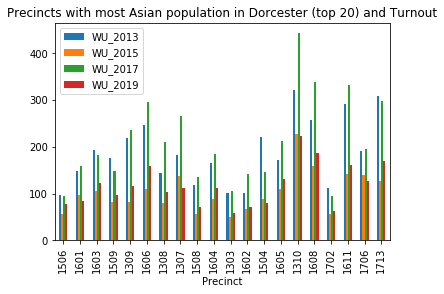

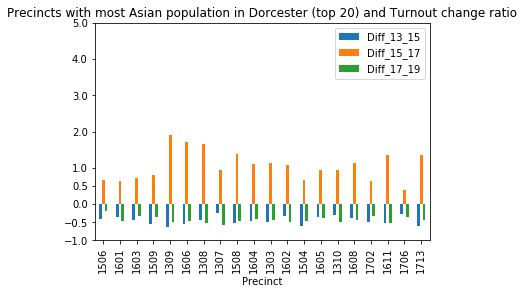

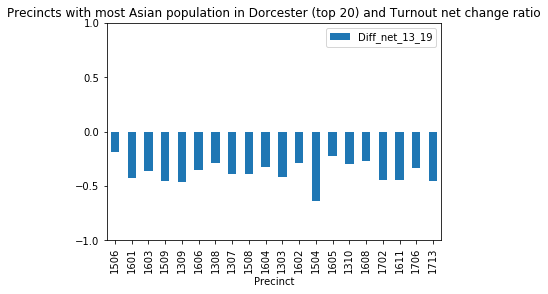

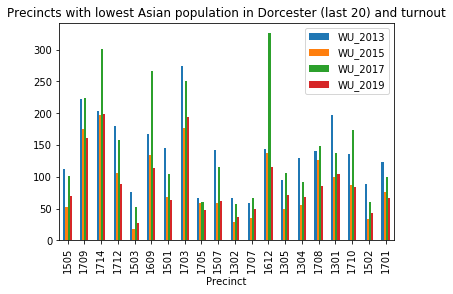

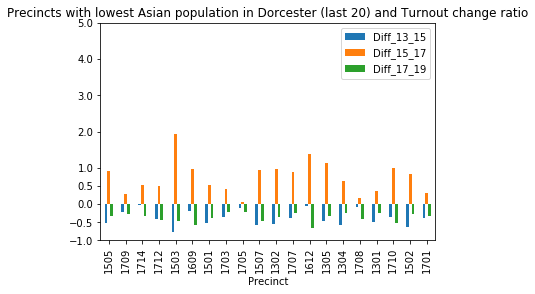

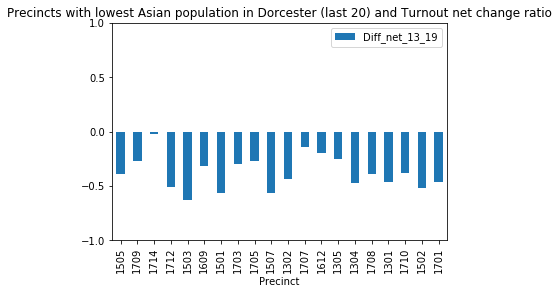

In [235]:
d_top_asian_wu = d_df_wu.sort_values(by = ['Asian Percentage'],ascending = False)

# visualizing top 20 (Asian)
d_top_asian_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with most Asian population in Dorcester (top 20) and Turnout")
d_top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with most Asian population in Dorcester (top 20) and Turnout change ratio")
d_top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with most Asian population in Dorcester (top 20) and Turnout net change ratio")

# visualizing least 20 (Asian)
d_top_asian_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Asian population in Dorcester (last 20) and turnout")
d_top_asian_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest Asian population in Dorcester (last 20) and Turnout change ratio")
d_top_asian_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Asian population in Dorcester (last 20) and Turnout net change ratio")




In [320]:
# export all datasets
df_f['wp_string'] = df_f['Precinct'].apply(lambda x: str(x).zfill(4))
df_wu['wp_string'] = df_wu['Precinct'].apply(lambda x: str(x).zfill(4))
df_f.to_csv("fra.csv")
df_wu.to_csv("wu.csv")